In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load audio files
audio_path = "audio_samples/piano_c.wav"
ipd.Audio(audio_path)

In [3]:
signal, sr = librosa.load(audio_path)

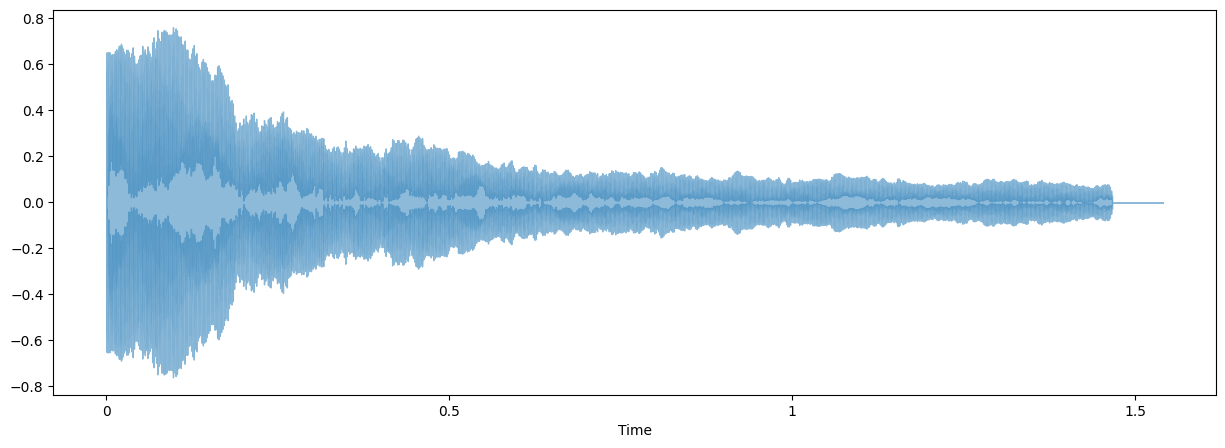

In [5]:
# plot waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [6]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.abs(ft)
frequency = np.linspace(0, sr, len(magnitude))

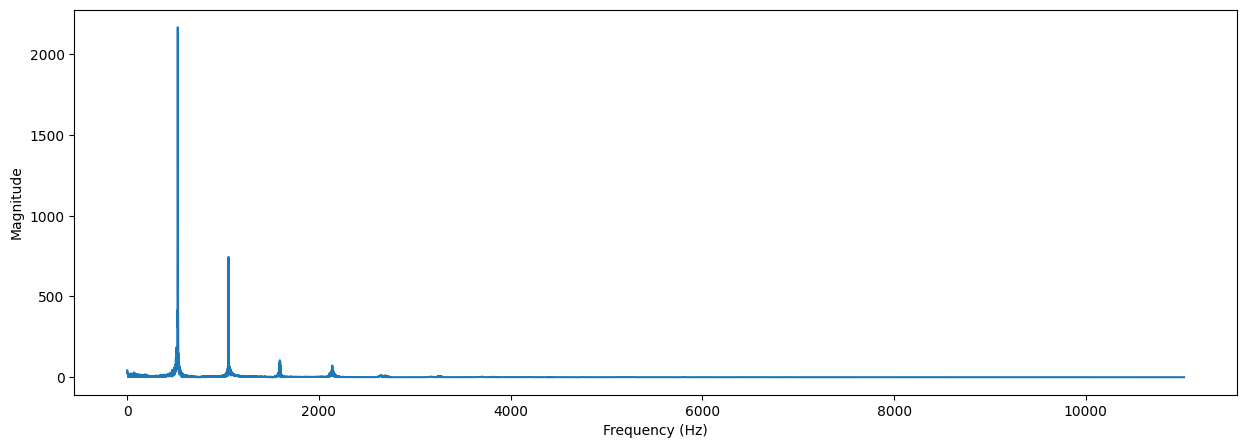

In [16]:
# plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(frequency[:len(frequency)//2], magnitude[:len(magnitude)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [9]:
len(signal)

33968

In [11]:
d = 1/sr
d

4.5351473922902495e-05

In [12]:
d_523 = 1/523
d_523

0.0019120458891013384

In [14]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

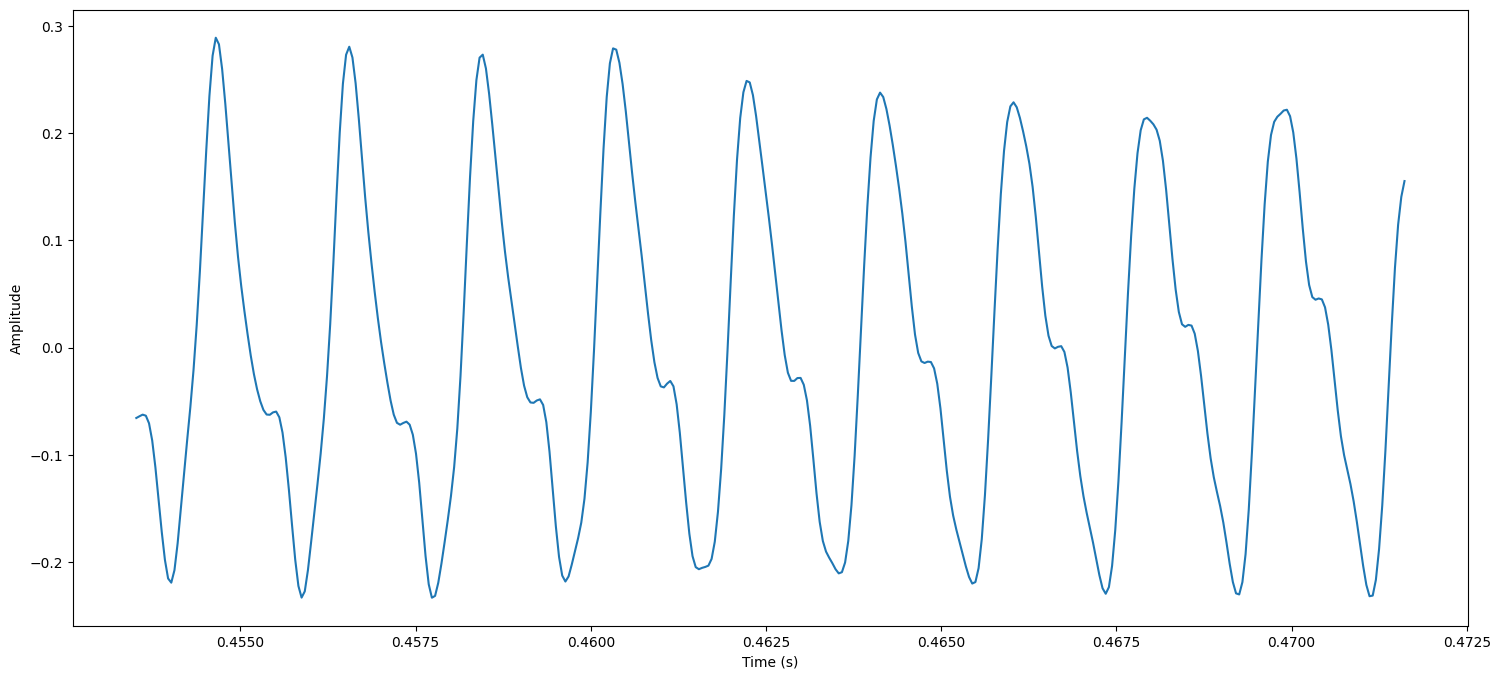

In [17]:
# zoom in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

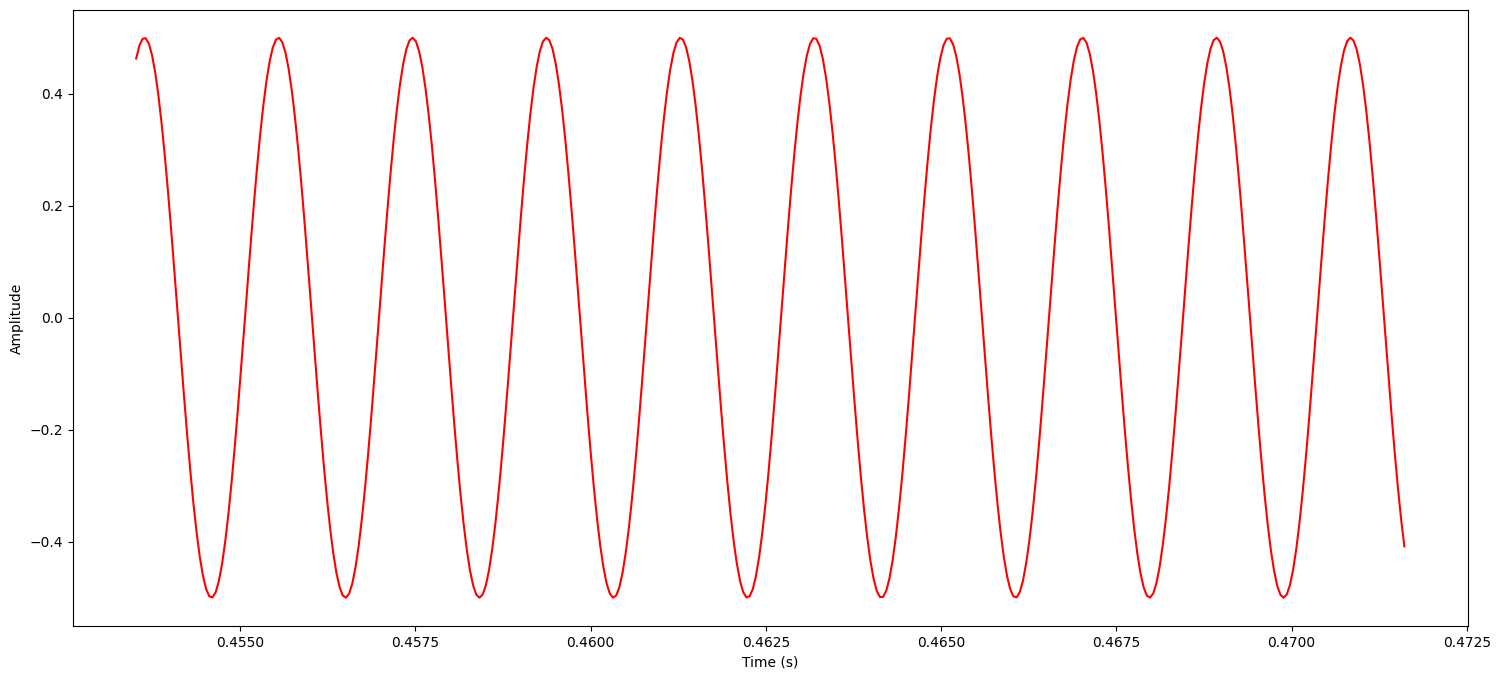

In [18]:
# create a sinusiod
f = 523
phase = 0
sin = 0.5 * np.sin(2 * np.pi * f * t - phase)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color='r')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

[0.0309017  0.01643801 0.00160991 ... 0.03666669 0.05007401 0.06237126]


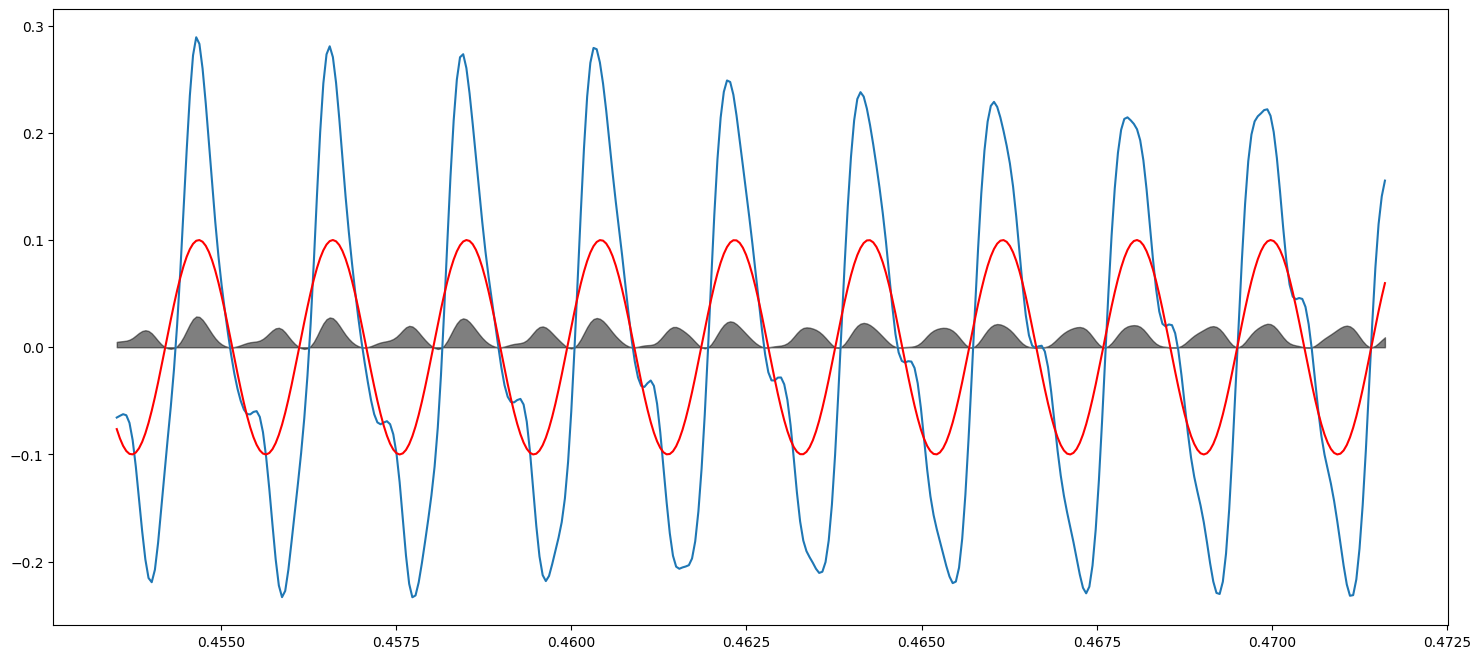

In [32]:
# Compare the two signals
f = 523
phase = 0.55
sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))
print(sin)
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400], label='Original Signal')
plt.plot(t[10000:10400], sin[10000:10400], color='r', label='Sine Wave (523 Hz)')
plt.fill_between(t[10000:10400], signal[10000:10400] * sin[10000:10400], color='black', alpha=0.5, label='Difference Area')
plt.show()

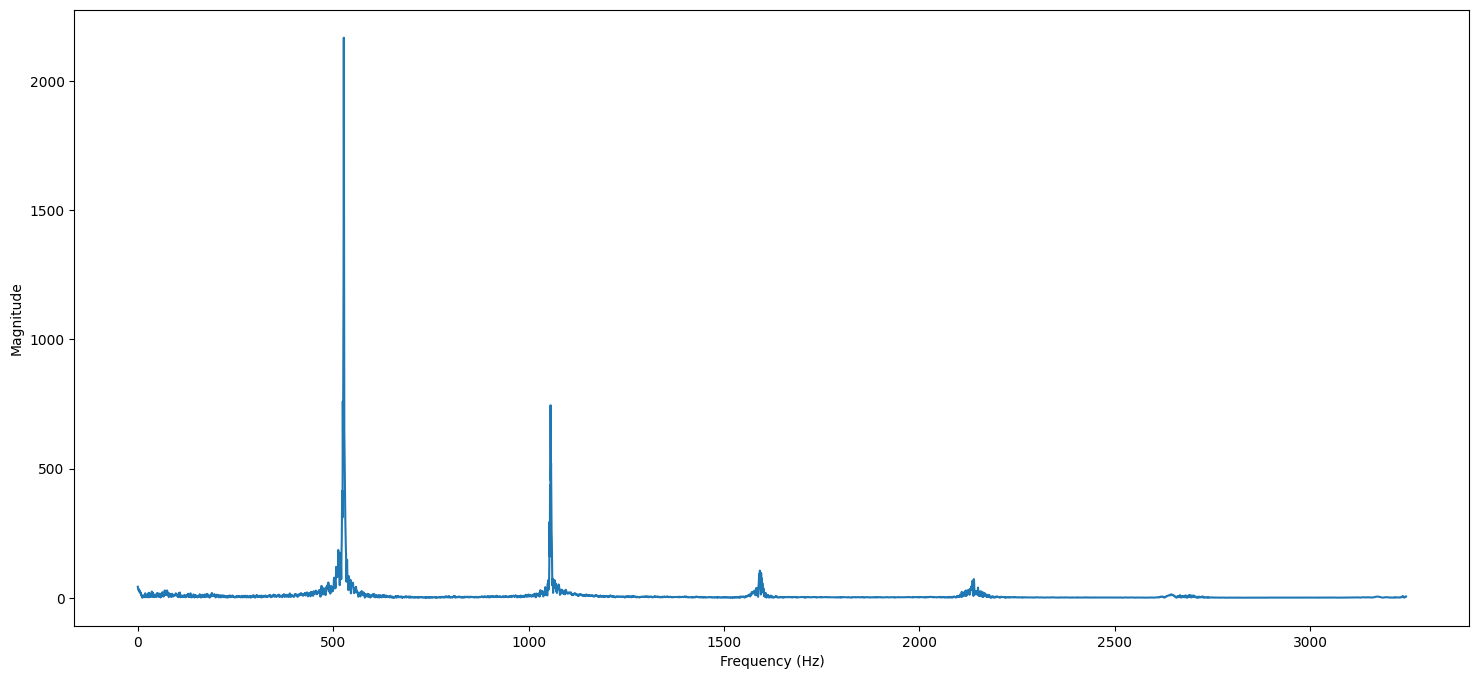

In [30]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()